['.config', 'timing_performance_dataset (1).csv', 'sample_data']


Saving timing_performance_dataset.csv to timing_performance_dataset.csv
Dataset Columns: Index(['Setup_Time_Violations', 'Hold_Time_Violations', 'Critical_Path_Delay',
       'Propagation_Delay', 'Clock_Skew', 'Clock_Domain_Crossings',
       'Fan_In_Count', 'Fan_Out_Count', 'Combinational_Logic_Levels',
       'Pipeline_Stages', 'Register_to_Register_Path_Length',
       'Multiplexer_Depth', 'Gate_Count', 'Logic_Optimization_Ratio',
       'Resource_Utilization', 'Retiming_Factor', 'Clock_Gating_Ratio',
       'Combinational_Depth', 'Timing_Violation_Probability'],
      dtype='object')
Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 1.1374 - mae: 0.5523 - val_loss: 0.8860 - val_mae: 0.3859 - learning_rate: 5.0000e-04
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.9457 - mae: 0.4187 - val_loss: 0.7986 - val_mae: 0.3360 - learning_rate: 5.0000e-04
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.8770 - mae: 0.3926 - val_loss: 0.7434 - val_mae: 0.3094 

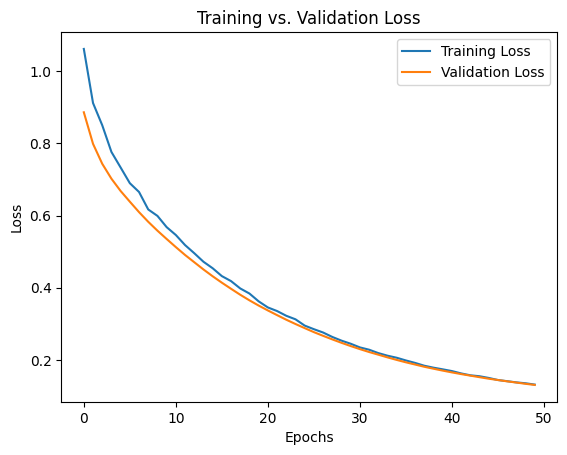

XGBoost MAE: 0.2505667621400293
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
MAE: 0.2421
RMSE: 0.2823
R² Score: -0.0284


In [5]:
import os
print(os.listdir())
from google.colab import files
uploaded = files.upload()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from xgboost import XGBRegressor


# Load dataset
df = pd.read_csv("timing_performance_dataset.csv")

# Identify the correct target column
print("Dataset Columns:", df.columns)  # Print column names to identify target
target_column = "Timing_Violation_Probability"  # Replace with the correct target column

if target_column not in df.columns:
    raise KeyError(f"Column '{target_column}' not found in dataset. Available columns: {df.columns}")

# Handle missing values
df.fillna(df.mean(), inplace=True)

X = df.drop(columns=[target_column])
y = df[target_column]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the dataset
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ✅ Define the Neural Network Model
model = Sequential([
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.2),
    Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.2),
    Dense(1)
])

# Compile the model
optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# ✅ Train the model and store training history
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=50,
                    batch_size=32,
                    callbacks=[early_stopping, reduce_lr])

# Evaluate the model
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test MAE: {test_mae}")

# ✅ Plot Training vs. Validation Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs. Validation Loss')
plt.show()

# ✅ Alternative Model: XGBoost
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.05, random_state=42)
xgb_model.fit(X_train, y_train)

# Evaluate XGBoost model
xgb_predictions = xgb_model.predict(X_test)
xgb_mae = np.mean(np.abs(y_test - xgb_predictions))
print(f"XGBoost MAE: {xgb_mae}")
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Use correct variable names
y_true = y_test  # Actual labels from test data
y_pred = model.predict(X_test)  # Model predictions

# Calculate performance metrics
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
r2 = r2_score(y_true, y_pred)

# Print results
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")
y_pred = y_pred.flatten()  # Ensure correct shape


In [7]:
# Ensure model is trained
if not hasattr(model, 'history'):
    raise ValueError("Model has not been trained. Run model.fit() first.")


In [9]:
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test MAE: {test_mae:.4f}")
y_pred = model.predict(X_test)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1302 - mae: 0.2412 
Test MAE: 0.2421
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [10]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")


MAE: 0.2421
RMSE: 0.2823
R² Score: -0.0284


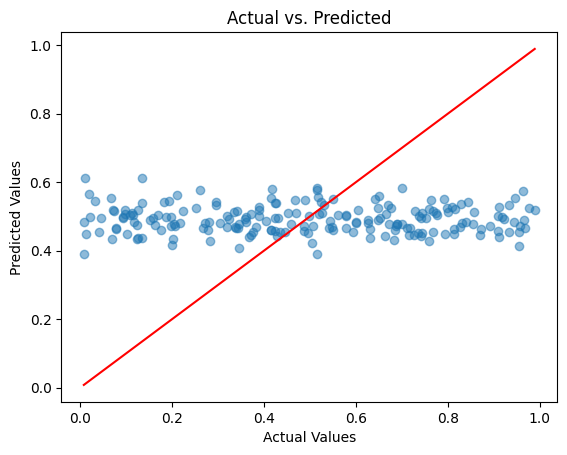

In [11]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Ideal line
plt.show()


In [13]:
model.save("trained_model.keras")  # Recommended format

